In [116]:
import pandas as pd
import numpy as np

In [117]:
df=pd.read_csv('C:/Users/user/Desktop/밀화부리/Python/customer_data(filtered).csv',
              encoding='cp949')
df.head()

,Unnamed: 0,Score,Review,SNS,Addr,Score2
0,0,5,안녕하세요. 데일리 신청해 봅니다. 어렸을 적 부터 장이 좋지 않았는데 고기 인...,twitter,경기도,good
1,1,2,오!! 안그래도 장이 안좋아서 아침마다 고생이거든요~~ 먹고 건강해지고 싶네용 ^^,facebook,서울특별시,bad
2,2,2,요즘 장이 안좋은지 하루종일 더부룩하고 배변후에도 시원하지 않네요.꼭 체험해보고싶습니다.,facebook,서울특별시,bad
3,3,3,우리 아이가 은가를 동글 동글 염소 똥처럼 눈답니다. 매번 너무 걱정이랍니다. 꼭 ...,facebook,서울특별시,normal
4,4,5,이것저것 유산균을 먹어봤지만 이거다~ 하는걸 아직 못만났어요. 장이 예민한 우리 작...,kakaostory,경상남도,good


In [118]:
from konlpy.tag import Twitter
twitter = Twitter()

C:\Users\user\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [119]:
def tokenize(text):
    stems = []
    tagged = twitter.pos(text)
    for i in range (0, len(tagged)): 
        if (tagged[i][1]=='Noun' or tagged[i][1]=='Adjective') :
            stems.append(tagged[i][0])
    return stems

In [120]:
tagged=twitter.pos(df['Review'][0])
for i in range(0,len(tagged)):
    if(tagged[i][1]=='Noun'):
        print(tagged[i])

('데', 'Noun')
('일리', 'Noun')
('신청', 'Noun')
('적', 'Noun')
('부터', 'Noun')
('고기', 'Noun')
('인스턴트', 'Noun')
('음식', 'Noun')
('장', 'Noun')
('상태', 'Noun')
('더욱', 'Noun')
('업무', 'Noun')
('스트레스', 'Noun')
('또한', 'Noun')
('것', 'Noun')
('체험', 'Noun')
('신청', 'Noun')
('보고', 'Noun')
('장', 'Noun')
('경험', 'Noun')
('보고', 'Noun')


In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [122]:
text_data_list=df['Review'].astype(str).tolist()
text_data_arr=np.array([''.join(text) for text in text_data_list])

In [123]:
vectorizer = TfidfVectorizer(min_df=2, tokenizer=tokenize, norm='l2')
text_data = vectorizer.fit_transform(text_data_arr)

In [124]:
df_tfidf = pd.DataFrame(text_data.A,columns=vectorizer.get_feature_names())
df_tfidf.head()

,가게,가격,가구,가기,가까이,가끔,가능,가능성,가도,가득,...,힘들어하는데,힘들어하더라,힘들어하셔서,힘들었는데,힘들었습니다,힘들었어요,힘들지만,힘듭니다,힘찬,힝
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


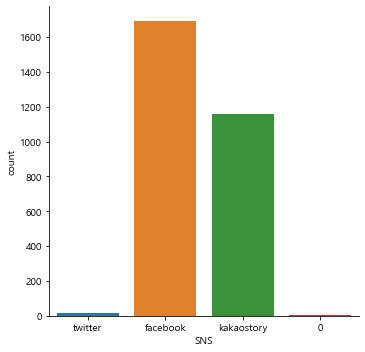

In [127]:
g=sns.factorplot('SNS',data=df,kind='count',size=5)
g.set_xlabels()

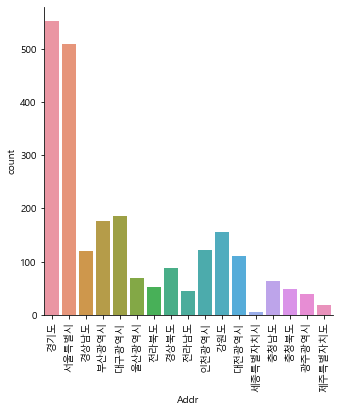

In [128]:
g=sns.factorplot('Addr',data=df,kind='count',size=5)
g.set_xticklabels(rotation=90)
g.set_xlabels()

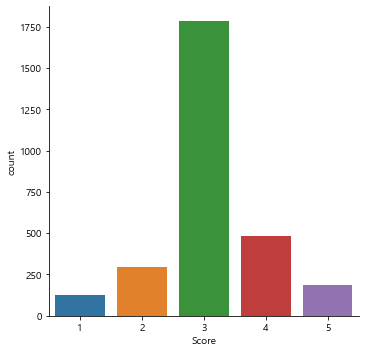

In [129]:
g=sns.factorplot('Score',data=df,kind='count',size=5)
g.set_xlabels()

In [130]:
df=df.dropna(subset=['Score'])
df.index=range(0,len(df))
df['Score2']=''

In [131]:
for i in range(0,len(df)) :
    if(df['Score'][i] < 3) :
        df['Score2'][i] = 'bad'
    elif (df['Score'][i] > 3) :
        df['Score2'][i] = 'good'
    elif (df['Score'][i] == 3) :
        df['Score2'][i] = 'normal'
df.head()

<ipython-input-131-0ec815ebe0dd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Score2'][i] = 'good'
<ipython-input-131-0ec815ebe0dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Score2'][i] = 'bad'
<ipython-input-131-0ec815ebe0dd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Score2'][i] = 'normal'


,Unnamed: 0,Score,Review,SNS,Addr,Score2
0,0,5,안녕하세요. 데일리 신청해 봅니다. 어렸을 적 부터 장이 좋지 않았는데 고기 인...,twitter,경기도,good
1,1,2,오!! 안그래도 장이 안좋아서 아침마다 고생이거든요~~ 먹고 건강해지고 싶네용 ^^,facebook,서울특별시,bad
2,2,2,요즘 장이 안좋은지 하루종일 더부룩하고 배변후에도 시원하지 않네요.꼭 체험해보고싶습니다.,facebook,서울특별시,bad
3,3,3,우리 아이가 은가를 동글 동글 염소 똥처럼 눈답니다. 매번 너무 걱정이랍니다. 꼭 ...,facebook,서울특별시,normal
4,4,5,이것저것 유산균을 먹어봤지만 이거다~ 하는걸 아직 못만났어요. 장이 예민한 우리 작...,kakaostory,경상남도,good


C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


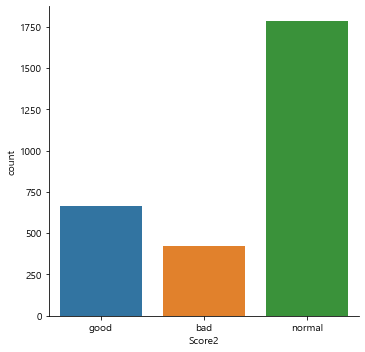

In [132]:
g=sns.factorplot('Score2',data=df,kind='count',size=5)
g.set_xlabels()

In [133]:
df.to_csv('customer_data(filtered).csv')

In [134]:
df=pd.read_csv('C:/Users/user/Desktop/밀화부리/Python/customer_data(filtered).csv',encoding='cp949')
df.head()

,Unnamed: 0,Score,Review,SNS,Addr,Score2
0,0,5,안녕하세요. 데일리 신청해 봅니다. 어렸을 적 부터 장이 좋지 않았는데 고기 인...,twitter,경기도,good
1,1,2,오!! 안그래도 장이 안좋아서 아침마다 고생이거든요~~ 먹고 건강해지고 싶네용 ^^,facebook,서울특별시,bad
2,2,2,요즘 장이 안좋은지 하루종일 더부룩하고 배변후에도 시원하지 않네요.꼭 체험해보고싶습니다.,facebook,서울특별시,bad
3,3,3,우리 아이가 은가를 동글 동글 염소 똥처럼 눈답니다. 매번 너무 걱정이랍니다. 꼭 ...,facebook,서울특별시,normal
4,4,5,이것저것 유산균을 먹어봤지만 이거다~ 하는걸 아직 못만났어요. 장이 예민한 우리 작...,kakaostory,경상남도,good


In [135]:
review_data=df['Review'].astype(str).tolist()
review_label=df['Score2'].astype(str).tolist()

In [136]:
trainset_size=int(round(len(review_data)*0.8))

x_train = np.array([''.join(data) for data in review_data[0:trainset_size]])
y_train = np.array([data for data in review_label[0:trainset_size]])

x_test = np.array([''.join(data) for data in review_data[trainset_size+1:len(review_data)]])
y_test = np.array([data for data in review_label[trainset_size+1:len(review_label)]])

In [137]:
x_train=vectorizer.fit_transform(x_train)
x_test= vectorizer.transform(x_test)

In [138]:
df_per=pd.DataFrame(columns=['Classifier','F-Measure','Accuracy'])
df_per

,Classifier,F-Measure,Accuracy


In [139]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [140]:
from sklearn.naive_bayes import MultinomialNB

dt_classifier = MultinomialNB().fit(x_train,y_train)
dt_pred=dt_classifier.predict(x_test)

print('\n confusion Matrix \n')
print(confusion_matrix(y_test,dt_pred))
print('\n Classification Report \n')
print(classification_report(y_test,dt_pred))
print('\n Accuracy \n')
print(round(accuracy_score(y_test, dt_pred, normalize=True),2))


 confusion Matrix 

[[  0   0  60]
 [  0   7  94]
 [  0   2 410]]

 Classification Report 

              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        60
        good       0.78      0.07      0.13       101
      normal       0.73      1.00      0.84       412

    accuracy                           0.73       573
   macro avg       0.50      0.35      0.32       573
weighted avg       0.66      0.73      0.63       573


 Accuracy 

0.73


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [141]:
fm=round(f1_score(y_test,dt_pred,average='weighted'),2)
ac=round(accuracy_score(y_test,dt_pred,normalize=True),2)
df_per.loc[len(df_per)]=['Naive Bayes',fm,ac]
df_per

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.63,0.73


In [142]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier=DecisionTreeClassifier().fit(x_train,y_train)
dt_pred=dt_classifier.predict(x_test)

print('\n confusion Matrix \n')
print(confusion_matrix(y_test,dt_pred))
print('\n Classification Report \n')
print(classification_report(y_test,dt_pred))
print('\n Accuracy \n')
print(round(accuracy_score(y_test, dt_pred, normalize=True),2))


 confusion Matrix 

[[ 38   0  22]
 [  1  55  45]
 [ 35  52 325]]

 Classification Report 

              precision    recall  f1-score   support

         bad       0.51      0.63      0.57        60
        good       0.51      0.54      0.53       101
      normal       0.83      0.79      0.81       412

    accuracy                           0.73       573
   macro avg       0.62      0.66      0.63       573
weighted avg       0.74      0.73      0.73       573


 Accuracy 

0.73


In [143]:
fm = round(f1_score(y_test, dt_pred, average='weighted'), 2)
ac = round(accuracy_score(y_test, dt_pred, normalize=True), 2)
df_per.loc[len(df_per)] = ['Decison Tree', fm, ac]
df_per

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.63,0.73
1,Decison Tree,0.73,0.73


In [144]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(x_train, y_train)
rf_pred = rf_classifier.predict(x_test)

print('\n Confusion Matrix \n')
print(confusion_matrix(y_test, rf_pred))
print('\n Classification Report \n')
print(classification_report(y_test, rf_pred))
print('\n Accuracy \n')
print(round(accuracy_score(y_test, rf_pred, normalize=True),2))


 Confusion Matrix 

[[ 52   0   8]
 [  0  53  48]
 [ 23   4 385]]

 Classification Report 

              precision    recall  f1-score   support

         bad       0.69      0.87      0.77        60
        good       0.93      0.52      0.67       101
      normal       0.87      0.93      0.90       412

    accuracy                           0.86       573
   macro avg       0.83      0.78      0.78       573
weighted avg       0.86      0.86      0.85       573


 Accuracy 

0.86


In [145]:
fm = round(f1_score(y_test, rf_pred, average='weighted'), 2)
ac = round(accuracy_score(y_test, rf_pred, normalize=True), 2)
df_per.loc[len(df_per)] = ['Random Forest', fm, ac]
df_per

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.63,0.73
1,Decison Tree,0.73,0.73
2,Random Forest,0.85,0.86


In [146]:
from sklearn.svm import LinearSVC

svm_classifier = LinearSVC().fit(x_train, y_train)
svm_pred = svm_classifier.predict(x_test)

print('\n Confusion Matrix \n')
print(confusion_matrix(y_test, svm_pred))
print('\n Classification Report \n')
print(classification_report(y_test, svm_pred))
print('\n Accuracy \n')
print(round(accuracy_score(y_test, svm_pred, normalize=True),2))


 Confusion Matrix 

[[ 38   0  22]
 [  0  62  39]
 [ 43  45 324]]

 Classification Report 

              precision    recall  f1-score   support

         bad       0.47      0.63      0.54        60
        good       0.58      0.61      0.60       101
      normal       0.84      0.79      0.81       412

    accuracy                           0.74       573
   macro avg       0.63      0.68      0.65       573
weighted avg       0.76      0.74      0.75       573


 Accuracy 

0.74


In [147]:
fm = round(f1_score(y_test, svm_pred, average='weighted'), 2)
ac = round(accuracy_score(y_test, svm_pred, normalize=True), 2)
df_per.loc[len(df_per)] = ['Support Vector Machine', fm, ac]
df_per

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.63,0.73
1,Decison Tree,0.73,0.73
2,Random Forest,0.85,0.86
3,Support Vector Machine,0.75,0.74


In [148]:
df_per_1=df_per.set_index('Classifier')
df_per_1

,F-Measure,Accuracy
Classifier,,
Naive Bayes,0.63,0.73
Decison Tree,0.73,0.73
Random Forest,0.85,0.86
Support Vector Machine,0.75,0.74


Text(0.5, 0, 'Classifier')

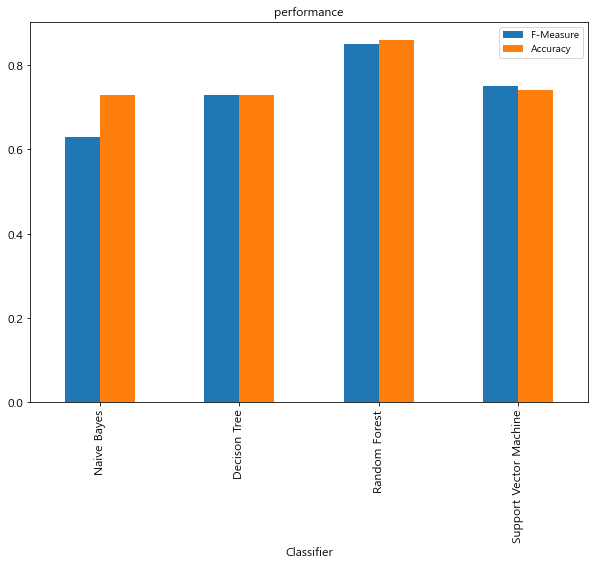

In [149]:
ax=df_per_1[['F-Measure','Accuracy']].plot(kind='bar', title='performance',
                                          figsize=(10,7),legend=True,fontsize=12)
ax.set_xlabel('Classifier',fontsize=12)